In [1]:
import numpy as np

import pandas as pd

# load data
here we use available data on scikit-learn

In [2]:
from sklearn.datasets import load_breast_cancer

X , y = load_breast_cancer(return_X_y = True)

In [3]:
data = load_breast_cancer()

# Split Data set into training and testing data

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

455
114


# preprocessing
## missing values
## transform categorical variables
here, we have a complete dataset and numerical values
we move to the next step




In [6]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

# Select an algorithm
## RandomForestClassifier


In [7]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)

### Advanced task
Use GridSearch to determine the optimal hyperparameters for the model.
Identify and select the three most crucial ones.



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Code here
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


## Train model


In [9]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## make predictions on testing data

In [10]:
y_pred = rf.predict(X_test)


# Evaluate the performance of the
## confusion matrix

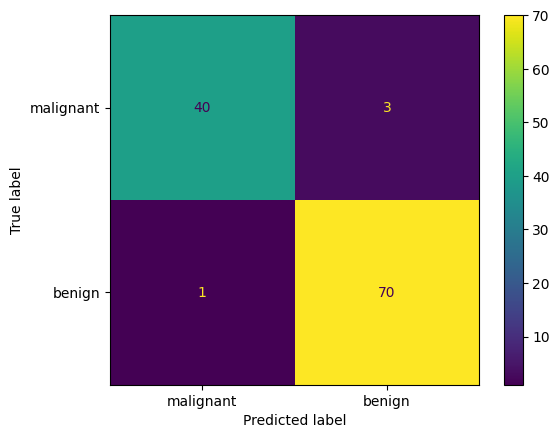

In [13]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# compute the confision matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.target_names)
disp.plot()

## Classification report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Choose another algorithm : DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)

## Train the model

In [16]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

# Make predicsions

In [17]:
y_pred = dtc.predict(X_test)

# Evaluation
## confusion matrix

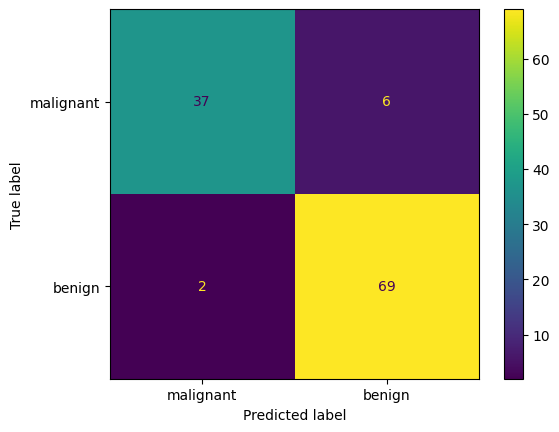

In [18]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# compute the confision matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.target_names)
disp.plot()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



### plot the tree to identify decision rules

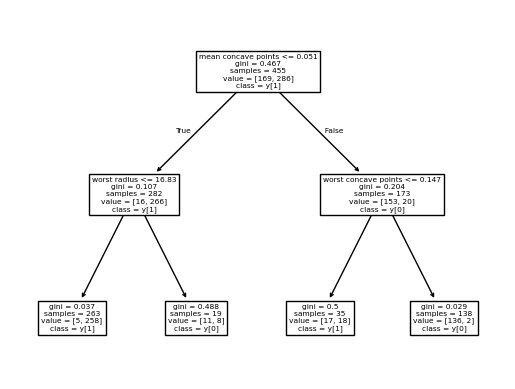

In [20]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plot_tree(dtc, class_names=True , feature_names=data.feature_names)
plt.show()

this tree is not exploitable; We have a lot a of decision rules.
We must fine tune the hyperparameters

In [21]:
#define the estimator to use
estimator = DecisionTreeClassifier()

# select values of hyperparameters (of the estimator) to optimize
params_grid = {
                "max_depth":[3,5, 6], # we can select more that 2 values
                "min_samples_leaf":[20,10,5]
               }
# specify how we evaluate the model to select the best hyperparameters
scoring = "accuracy"

# initiate the gridsearch class
dtc = GridSearchCV(estimator = estimator,param_grid = params_grid, scoring = scoring)


## train the model with gridsearch

In [22]:
dtc.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 6],
                         'min_samples_leaf': [20, 10, 5]},
             scoring='accuracy')

In [23]:
print("the best score is ",dtc.best_score_)
print("the best parameters are ",dtc.best_params_)
print("all results :\n",dtc.cv_results_)


the best score is  0.9340659340659341
the best parameters are  {'max_depth': 3, 'min_samples_leaf': 5}
all results :
 {'mean_fit_time': array([0.00448523, 0.00445967, 0.00374861, 0.00374498, 0.00448489,
       0.00497847, 0.00381927, 0.0118474 , 0.00544066]), 'std_fit_time': array([0.00071947, 0.00051951, 0.00020587, 0.00028075, 0.00027345,
       0.00030355, 0.00029275, 0.01231345, 0.00029723]), 'mean_score_time': array([0.00104609, 0.00092144, 0.00064564, 0.00064478, 0.00071187,
       0.00068784, 0.00068789, 0.00106153, 0.00070543]), 'std_score_time': array([2.56371426e-04, 2.45867264e-04, 4.71957993e-05, 2.81526209e-05,
       5.33155122e-05, 4.53308900e-05, 3.29905845e-05, 3.02707803e-04,
       2.52738988e-05]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 6, 6, 6],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=999999), 'param_min_samples_leaf': masked_array(data=[20, 10, 5, 20, 10, 5, 20, 10, 5]

## Gradient Boosting algorithm

In [26]:
from sklearn.ensemble import GradientBoostingClassifier


# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'max_depth': [3, 5, 10]  # Profondeur des arbres
}

# Initialiser le modèle
gb = GradientBoostingClassifier(random_state=42)

# Exécuter Grid Search avec Cross-Validation
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator_

# Faire des prédictions sur les données de test
y_pred = best_model.predict(X_test)

# Évaluer la performance
y_pred

# Afficher les résultats
print("Meilleurs hyperparamètres:", grid_search.best_params_)



Meilleurs hyperparamètres: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# Model selection

You have several trained classification models for a medical diagnosis problem. Your goal is to evaluate these models and identify the best one based on an appropriate metric.  

## 1. Selecting the Metric  
- Choose a relevant metric to evaluate the quality of the models in this context.  
- Justify your choice by explaining why this metric is more suitable than others (e.g., accuracy, precision, recall, F1-score, AUC-ROC).  

## 2. Comparing the Models  
- Using the selected metric, compare the performance of the provided models.  
- Identify the model that achieves the best results according to your chosen criterion.  
- Discuss the results and explain whether they align with the needs of medical diagnosis (e.g., handling imbalanced data, cost of false positives/false negatives).  
